# BUSINESS GAME 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import pandas as pd

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

Now let's solve the same problem analyzed in one of the previous lab using a simple neural network implemented in PyTorch.


### Dataset

In [3]:
class CsvDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        # Read the file and split the lines in a list
        with open(csv_file, 'r') as f:
            lines = f.read().split('\n')
        # Get x and y values from each line and append to self.data
        self.data = []
        for line in lines:
            sample = line.split(',')
            self.data.append((float(sample[0]), float(sample[1])))
        # Now self.data contains all our dataset.
        # Each element of the list self.data is a tuple: (input, output)

    def __len__(self):
        # The length of the dataset is simply the length of the self.data list
        return len(self.data)

    def __getitem__(self, idx):
        # Our sample is the element idx of the list self.data
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

### Transforms

In [4]:
class ToTensor(object):
    """Convert sample to Tensors."""

    def __call__(self, sample):
        x, y = sample
        return (torch.tensor([x]).float(),
                torch.tensor([y]).float())

In [7]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training device: {device}")

Training device: cuda


In [8]:
class ClassifierDataset_val(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        # Read the file and store the content in a pandas DataFrame
        self.df = pd.read_csv(csv_file)

    def __len__(self):
        # The length of the dataset is simply the length of the self.data list
        return len(self.df)

    def __getitem__(self, idx):
        # Our sample is the row at index idx of the dataframe
        row = self.df.iloc[idx]
        # There are 2 inputs this time
        sample = ([row.ACCESS_COARSE_LOCATION, 
                   row.ACCESS_FINE_LOCATION, 
                   row.ACCESS_LOCATION_EXTRA_COMMANDS,
                   row.ACCESS_MOCK_LOCATION,
                   row.ACCESS_NETWORK_STATE,
                   row.ACCESS_WIFI_STATE,
                   row.ACTIVITY_RECOGNITION,
                   row.AUTHENTICATE_ACCOUNTS,
                   row.BADGE_COUNT_READ,
                   row.BADGE_COUNT_WRITE,
                   row.BILLING,
                   row.BIND_GET_INSTALL_REFERRER_SERVICE,
                   row.BLUETOOTH,
                   row.BLUETOOTH_ADMIN,
                   row.BROADCAST_BADGE,
                   row.BROADCAST_STICKY,
                   row.C2D_MESSAGE,
                   row.CALL_PHONE,
                   row.CAMERA,
                   row.CHANGE_BADGE,
                   row.CHANGE_CONFIGURATION,
                   row.CHANGE_NETWORK_STATE,
                   row.CHANGE_WIFI_STATE,
                   row.CLEAR_APP_CACHE,
                   row.DISABLE_KEYGUARD,
                   row.DOWNLOAD_WITHOUT_NOTIFICATION,
                   row.FLASHLIGHT,
                   row.FOREGROUND_SERVICE,
                   row.GET_ACCOUNTS,
                   row.GET_TASKS,
                   row.INSTALL_SHORTCUT,
                   row.INTERNET,
                   row.KILL_BACKGROUND_PROCESSES,
                   row.MANAGE_ACCOUNTS,
                   row.MODIFY_AUDIO_SETTINGS,
                   row.MOUNT_UNMOUNT_FILESYSTEMS,
                   row.NFC,
                   row.PROCESS_OUTGOING_CALLS,
                   row.PROVIDER_INSERT_BADGE,
                   row.READ,
                   row.READ_APP_BADGE,
                   row.READ_CALENDAR,
                   row.READ_CONTACTS,
                   row.READ_EXTERNAL_STORAGE,
                   row.READ_GSERVICES,
                   row.READ_LOGS,
                   row.READ_PHONE_STATE,
                   row.READ_PROFILE,
                   row.READ_SETTINGS,
                   row.READ_SMS,
                   row.READ_SYNC_SETTINGS,
                   row.RECEIVE,
                   row.RECEIVE_BOOT_COMPLETED,
                   row.RECEIVE_SMS,
                   row.RECEIVE_USER_PRESENT,
                   row.RECORD_AUDIO,
                   row.REQUEST_INSTALL_PACKAGES,
                   row.RESTART_PACKAGES,
                   row.SEND_SMS,
                   row.SET_ALARM,
                   row.SET_WALLPAPER,
                   row.SET_WALLPAPER_HINTS,
                   row.SYSTEM_ALERT_WINDOW,
                   row.UNINSTALL_SHORTCUT,
                   row.UPDATE_BADGE,
                   row.UPDATE_COUNT,
                   row.UPDATE_SHORTCUT,
                   row.USE_CREDENTIALS,
                   row.USE_FINGERPRINT,
                   row.VIBRATE,
                   row.WAKE_LOCK,
                   row.WRITE,
                   row.WRITE_CALENDAR,
                   row.WRITE_CONTACTS,
                   row.WRITE_EXTERNAL_STORAGE,
                   row.WRITE_SETTINGS,
                   row.WRITE_SYNC_SETTINGS,
                   row.WRITE_USE_APP_FEATURE_SURVEY,
                   row.Recent
                ],0
)
        if self.transform:
            sample = self.transform(sample)
        return sample

In [9]:
class ClassifierDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        # Read the file and store the content in a pandas DataFrame
        self.df = pd.read_csv(csv_file)

    def __len__(self):
        # The length of the dataset is simply the length of the self.data list
        return len(self.df)

    def __getitem__(self, idx):
        # Our sample is the row at index idx of the dataframe
        row = self.df.iloc[idx]
        # There are 2 inputs this time
        sample = ([row.ACCESS_COARSE_LOCATION, 
                   row.ACCESS_FINE_LOCATION, 
                   row.ACCESS_LOCATION_EXTRA_COMMANDS,
                   row.ACCESS_MOCK_LOCATION,
                   row.ACCESS_NETWORK_STATE,
                   row.ACCESS_WIFI_STATE,
                   row.ACTIVITY_RECOGNITION,
                   row.AUTHENTICATE_ACCOUNTS,
                   row.BADGE_COUNT_READ,
                   row.BADGE_COUNT_WRITE,
                   row.BILLING,
                   row.BIND_GET_INSTALL_REFERRER_SERVICE,
                   row.BLUETOOTH,
                   row.BLUETOOTH_ADMIN,
                   row.BROADCAST_BADGE,
                   row.BROADCAST_STICKY,
                   row.C2D_MESSAGE,
                   row.CALL_PHONE,
                   row.CAMERA,
                   row.CHANGE_BADGE,
                   row.CHANGE_CONFIGURATION,
                   row.CHANGE_NETWORK_STATE,
                   row.CHANGE_WIFI_STATE,
                   row.CLEAR_APP_CACHE,
                   row.DISABLE_KEYGUARD,
                   row.DOWNLOAD_WITHOUT_NOTIFICATION,
                   row.FLASHLIGHT,
                   row.FOREGROUND_SERVICE,
                   row.GET_ACCOUNTS,
                   row.GET_TASKS,
                   row.INSTALL_SHORTCUT,
                   row.INTERNET,
                   row.KILL_BACKGROUND_PROCESSES,
                   row.MANAGE_ACCOUNTS,
                   row.MODIFY_AUDIO_SETTINGS,
                   row.MOUNT_UNMOUNT_FILESYSTEMS,
                   row.NFC,
                   row.PROCESS_OUTGOING_CALLS,
                   row.PROVIDER_INSERT_BADGE,
                   row.READ,
                   row.READ_APP_BADGE,
                   row.READ_CALENDAR,
                   row.READ_CONTACTS,
                   row.READ_EXTERNAL_STORAGE,
                   row.READ_GSERVICES,
                   row.READ_LOGS,
                   row.READ_PHONE_STATE,
                   row.READ_PROFILE,
                   row.READ_SETTINGS,
                   row.READ_SMS,
                   row.READ_SYNC_SETTINGS,
                   row.RECEIVE,
                   row.RECEIVE_BOOT_COMPLETED,
                   row.RECEIVE_SMS,
                   row.RECEIVE_USER_PRESENT,
                   row.RECORD_AUDIO,
                   row.REQUEST_INSTALL_PACKAGES,
                   row.RESTART_PACKAGES,
                   row.SEND_SMS,
                   row.SET_ALARM,
                   row.SET_WALLPAPER,
                   row.SET_WALLPAPER_HINTS,
                   row.SYSTEM_ALERT_WINDOW,
                   row.UNINSTALL_SHORTCUT,
                   row.UPDATE_BADGE,
                   row.UPDATE_COUNT,
                   row.UPDATE_SHORTCUT,
                   row.USE_CREDENTIALS,
                   row.USE_FINGERPRINT,
                   row.VIBRATE,
                   row.WAKE_LOCK,
                   row.WRITE,
                   row.WRITE_CALENDAR,
                   row.WRITE_CONTACTS,
                   row.WRITE_EXTERNAL_STORAGE,
                   row.WRITE_SETTINGS,
                   row.WRITE_SYNC_SETTINGS,
                   row.WRITE_USE_APP_FEATURE_SURVEY,
                   row.Recent
                ], 
                  row.Malware
)
        if self.transform:
            sample = self.transform(sample)
        return sample

Initialize the datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BG2023_train.csv to BG2023_train.csv


In [ ]:
from sklearn.model_selection import train_test_split

composed_transform = transforms.Compose([ToTensor()])

#train_dataset = ClassifierDataset('BG2023_train.csv', transform=composed_transform)

train_dataset, val_dataset = train_test_split(ClassifierDataset('BG2023_train.csv', transform=composed_transform),test_size = 0.2)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BG2023_validation.csv to BG2023_validation.csv


In [ ]:
test_dataset   = ClassifierDataset_val('BG2023_validation.csv', transform=composed_transform)

Define the dataloaders

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True, num_workers=0)
val_dataloader   = DataLoader(val_dataset,   batch_size=len(val_dataset), shuffle=True, num_workers=0)
test_dataloader  = DataLoader(test_dataset,  batch_size=len(test_dataset), shuffle=True, num_workers=0)

## Network definition

In [ ]:
class Net(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, No):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.act = nn.ReLU()
        self.act1 = nn.Sigmoid()
        
    def forward(self, x, additional_out=False):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act1(self.out(x))
        return x

## Training loop

In [ ]:
# TRAINING DEVICE
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training device: {device}")

Training device: cuda


In [ ]:
# Initialize the network
torch.manual_seed(0)
Ni = 79
Nh1 = 256
Nh2 = 256
No = 1 

net = Net(Ni, Nh1, Nh2, No)
net.to(device)

# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [ ]:
### TRAINING LOOP
num_epochs = 500
train_loss_log = []
val_loss_log = []
for epoch_num in range(num_epochs):
    print('#################')
    print(f'# EPOCH {epoch_num}')
    print('#################')

    ### TRAIN
    train_loss= []
    net.train() # Training mode (e.g. enable dropout)
    for sample_batched in train_dataloader:
        # Move data to device
        x_batch = sample_batched[0].to(device)
        label_batch = sample_batched[1].to(device)

        # Forward pass
        out = net(x_batch)

        # Compute loss
        loss = loss_fn(out, label_batch)

        # Backpropagation
        net.zero_grad()
        loss.backward()

        # Update the weights
        optimizer.step()

        # Save train loss for this batch
        loss_batch = loss.detach().cpu().numpy()
        train_loss.append(loss_batch)

    # Save average train loss
    train_loss = np.mean(train_loss)
    print(f"AVERAGE TRAIN LOSS: {train_loss}")
    train_loss_log.append(train_loss)

    ### VALIDATION
    val_loss= []
    net.eval() # Evaluation mode (e.g. disable dropout)
    with torch.no_grad(): # Disable gradient tracking
        for sample_batched in val_dataloader:
            # Move data to device
            x_batch = sample_batched[0].to(device)
            label_batch = sample_batched[1].to(device)

            # Forward pass
            out = net(x_batch)

            # Compute loss
            loss = loss_fn(out, label_batch)

            # Save val loss for this batch
            loss_batch = loss.detach().cpu().numpy()
            val_loss.append(loss_batch)

        # Save average validation loss
        val_loss = np.mean(val_loss)
        print(f"AVERAGE VAL LOSS: {np.mean(val_loss)}")
        val_loss_log.append(val_loss)
    

#################
# EPOCH 0
#################
AVERAGE TRAIN LOSS: 0.7048302888870239
AVERAGE VAL LOSS: 0.6552567481994629
#################
# EPOCH 1
#################
AVERAGE TRAIN LOSS: 0.6206960082054138
AVERAGE VAL LOSS: 0.6057009696960449
#################
# EPOCH 2
#################
AVERAGE TRAIN LOSS: 0.5726358294487
AVERAGE VAL LOSS: 0.5562576055526733
#################
# EPOCH 3
#################
AVERAGE TRAIN LOSS: 0.5505906343460083
AVERAGE VAL LOSS: 0.5593997240066528
#################
# EPOCH 4
#################
AVERAGE TRAIN LOSS: 0.5482509732246399
AVERAGE VAL LOSS: 0.5570293664932251
#################
# EPOCH 5
#################
AVERAGE TRAIN LOSS: 0.5481439828872681
AVERAGE VAL LOSS: 0.5587111115455627
#################
# EPOCH 6
#################
AVERAGE TRAIN LOSS: 0.5467596054077148
AVERAGE VAL LOSS: 0.5570217370986938
#################
# EPOCH 7
#################
AVERAGE TRAIN LOSS: 0.5455522537231445
AVERAGE VAL LOSS: 0.5582207441329956
#################
# EPOCH 8

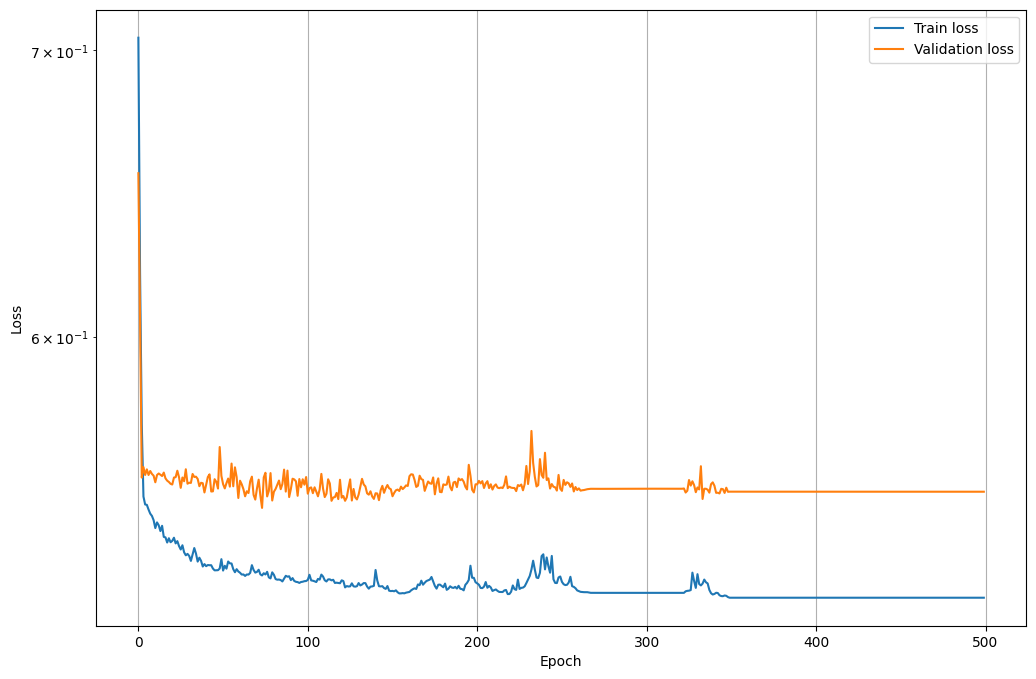

In [ ]:
# Plot losses
plt.figure(figsize=(12,8))
plt.semilogy(train_loss_log, label='Train loss')
plt.semilogy(val_loss_log, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

## Final test

Iterate the dataloader a single time and save all the outputs (in case you have multiple batches)

In [ ]:
all_inputs = []
all_outputs = []
all_labels = []
net.eval() # Evaluation mode (e.g. disable dropout)
threshold = 0.6
with torch.no_grad(): # Disable gradient tracking
    for sample_batched in test_dataloader:
        # Move data to device
        x_batch = sample_batched[0].to(device)
        #label_batch = sample_batched[1].to(device)
        # Forward pass
        out = net(x_batch)
        # Save outputs and labels
        all_inputs.append(x_batch)
        out = (out > threshold).float()
        print(out)
        all_outputs.append(out)
        #all_labels.append(label_batch)
# Concatenate all the outputs and labels in a single tensor
all_inputs  = torch.cat(all_inputs)
all_outputs = torch.cat(all_outputs)


#all_labels  = torch.cat(all_labels)




tensor([[0.],
        [1.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]], device='cuda:0')


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
np.savetxt('np1.txt', all_outputs.cpu(), fmt='%d')

